# Employee Turnover Prediction and Feature Analysis
### Introduction
According to the US Society for Human Resource Management (SHRM), employee turnover can cost a company the equivalent of 6 to 9 months' salary to find and train a suitable replacement. Therefore, it is essential for companies to manage and reduce employee turnover. In this project, we will train two machine learning models using Random Forest Classifier and Logistic Regression to predict whether or not a employee will take the leave. We will compare the performance of these two models and analyse the key factors influencing employees' behaviours to leave. Finally, we will discuss some strategies to improve employee retention rates.
###### Note that due to the inherent randomness in machine learning algorithms, the results and accuracy presented in this report may show slight variations when reproduced.
###### Make sure that all documents are in the same folder which includes one csv file, one ipynb file, one py file.

### Packages
In order to continue this project, please install and import the following packages:  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from turnover_prediction import load_data, get_data_description, data_inspection, preprocessing, train_default_model, hyperparameter_tuning, evaluate_model, get_feature_importance, plot_correlation_heatmap

### Data description
The dataset contains HR data from 14,999 employees. The dataset can be downloaded from Kaggle (https://www.kaggle.com/datasets/giripujar/hr-analytics/versions/1). The dataset provides information on various features, which are listed in the table below.


In [2]:
# Load data
data = load_data("HR_comma_sep.csv")

# Data description
description_df = get_data_description()
print(description_df.to_string(index=False))

             Variable                         Description        Type
   satisfaction_level        Job satisfaction level [0–1]   numerical
      last_evaluation Last performance review score [0–1]   numerical
       number_project                  Number of projects   numerical
average_monthly_hours        Average monthly hours worked   numerical
   time_spend_company                Years at the company   numerical
        Work_accident            Work accident experience categorical
                 left                    Left the company categorical
promotion_last_5years            Promoted in last 5 years categorical
           Department                          Department categorical
               salary          Salary (low, medium, high) categorical


The data is well documented, with no missing values in any of the variables.
Notably, that the data distribution is highly imbalanced for some variables, which could affect the fairness and accuracy of the models when weighing these factors. For instance, in the "promoted_last_5_years" variable, only 2.1% of the employees have been promoted in the last five years. Lastly, the overall turnover rate is 23.8%.

In [3]:
# NAN value counts and overall turnover rate
promotion_counts, turnover_rate = data_inspection(data)


NAN value count:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

Promotion last 5 years distribution in percentage:
promotion_last_5years
0    97.873192
1     2.126808
Name: proportion, dtype: float64

Turnover rate:
left
0    0.761917
1    0.238083
Name: count, dtype: float64


### Data preprocessing
In this section, we will preprocess the dataset to enhance its analyzability. First, we designate the "left" variable as our output and use all other variables as input features. Next, we will map the "salary" variable to numerical values, giving low as 1, medium as 2, and high as 3. Additionally, we will turn the "Department" variable into dummy variables to make it categorical. Lastly, we will split the dataset into training and testing data and normalise the features using the StandardScaler function.

In [4]:
# Data preprocessing
x_train, x_test, y_train, y_test, X, y = preprocessing(data)

### Random forest model

In this section, we will train our model using the Random Forest Classifier. The accuracy of the default model is already very high, with 99.17% on the test data. We employed a grid search function to identify the optimal hyperparameters for the model. However, after tuning, the accuracy remained unchanged, showing that the model has high robustness. Additionally, with a 5-fold cross-validation accuracy of 99.0%, we can conclude that the model has a low risk of overfitting.

In [5]:
# Training random forest model
clf = train_default_model(x_train, y_train, x_test, y_test)

# Tuning parameters
best_clf = hyperparameter_tuning(x_train, y_train)

# Evaluation the best model
evaluate_model(best_clf, x_test, y_test)

Test Accuracy (Default Model): 0.9923333333333333
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy:  0.9900823954425455
Test Accuracy (Tuned Model): 0.9926666666666667
[[2281    6]
 [  16  697]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2287
           1       0.99      0.98      0.98       713

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



### Feature importance
Our model performs well in this dataset, not only on training data but also on testing data. In this section, we will examine feature importance, revealing that the top three important features are satisfaction level, number of projects, and years worked at the company.
However, we can only see the value of each feature's importance, we cannot determine the direction of their influence. Specifically, we cannot determine whether these features encourage employees to leave or decrease their intention of leaving. Therefore, in the next section, we will train a Logistic Regression model to further analyze the data.

In [6]:
# Display feature importance
feature_importance_df = get_feature_importance(clf, X)

                   Feature  Importance
0       satisfaction_level    0.336109
2           number_project    0.187574
4       time_spend_company    0.179029
3     average_montly_hours    0.135194
1          last_evaluation    0.124229
7                   salary    0.010480
5            Work_accident    0.008500
16    Department_technical    0.003594
14        Department_sales    0.003145
15      Department_support    0.002728
9    Department_accounting    0.001556
10           Department_hr    0.001511
6    promotion_last_5years    0.001495
8         Department_RandD    0.001379
11   Department_management    0.001335
12    Department_marketing    0.001242
13  Department_product_mng    0.000899


### Logistic regression model
The Random Forest model outperforms the Logistic Regression model in terms of accuracy, achieving 99.17% compared to 79.8%. The Random Forest model also shows better precision and recall, particularly in predicting employees who leave the company. In contrast, the Logistic Regression model has lower precision for predicting those who left, indicating it struggles more with this prediction. Overall, the Random Forest model is more reliable for this analysis.

In [7]:
# Logistic regression model trainging
regressionmodel = LogisticRegression()
regressionmodel.fit(x_train, y_train)
# Accuracy
accuracy = regressionmodel.score(x_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Prediction result
y_pred = regressionmodel.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.798
[[2112  175]
 [ 431  282]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2287
           1       0.62      0.40      0.48       713

    accuracy                           0.80      3000
   macro avg       0.72      0.66      0.68      3000
weighted avg       0.78      0.80      0.78      3000



# Coefficients of features
When comparing feature importance between the Random Forest and Logistic Regression models, distinct differences appears. Random Forest identifies satisfaction level, number of projects, and years at the company as key features influencing employee turnover. In contrast, Logistic Regression provides clear directional impacts with positive and negative coefficients; for example, higher satisfaction correlates with lower turnover, while work accident experience reduces the likelihood of leaving.

In [8]:
# Figure of Coefficient values
coefficients = regressionmodel.coef_[0]
intercept = regressionmodel.intercept_[0]
feature_names = X.columns 
coef_of_feature = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_of_feature['Absolute Coefficient'] = coef_of_feature['Coefficient'].abs()
coef = coef_of_feature.sort_values(by='Absolute Coefficient', ascending=False).drop('Absolute Coefficient', axis=1)
print(coef)

                   Feature  Coefficient
0       satisfaction_level    -1.034029
5            Work_accident    -0.521136
7                   salary    -0.438780
4       time_spend_company     0.384961
2           number_project    -0.374002
3     average_montly_hours     0.205360
6    promotion_last_5years    -0.203985
1          last_evaluation     0.108536
10           Department_hr     0.094274
8         Department_RandD    -0.088725
16    Department_technical     0.083010
11   Department_management    -0.078929
15      Department_support     0.071239
14        Department_sales     0.060549
12    Department_marketing     0.026518
9    Department_accounting     0.023013
13  Department_product_mng     0.013308


# General conclusion
By employing two machine learning models to predict employee turnover behaviour, we can easily observe that both models consider employee satisfaction level to be the most important factor influencing turnover rates. This is obviously reasonable; employees with high satisfaction levels are less likely to leave. Conversely, it is also crucial to consider work accident experience, years with the company, and the number of projects seriously. The correlation heat map clearly shows that the longer employees stay with the company, the more likely they are to leave. We attribute this effect to survivorship bias; as employees spend more time in the company, the likelihood of leaving accumulates. Importantly, to reduce turnover rates, the most critical feature is employee satisfaction, and salary is the second most important factor.  

However, in real-life situations, it is impossible for a company to ensure that every employee is satisfied with both their work experience and salary. Since we cannot control employee satisfaction levels, salaries, or the length of time employees stay with the company, this becomes a challenge. Under these conditions, the most significant finding from this project is that providing work accident experiences may actually help reduce turnover rates. Psychologically, this may relate to the sunk cost theory. Specifically, when employees experience an accident, they tend to invest more effort in their work, viewing it as a sunk cost, as we tend to avoid losses, which ultimately reduces their likelihood of leaving.  

In our analysis, we found that the Random Forest model significantly outperforms the Logistic Regression model when it comes to predicting employee turnover. The Random Forest model excels in capturing complex interactions and non-linear relationships among various features, making it a more reliable choice for understanding employee behaviour in this context. In contrast, while the Logistic Regression model offers clearer interpretability, it often oversimplifies the relationships within the data, which may lead to less accurate predictions.  

However, it is essential to acknowledge the limitations of our project. One notable constraint is the reliance on historical data, which may not fully capture future changes in employee behaviour or external factors such as economic shifts or organisational changes. Additionally, the feature selection process, while thorough, might have omitted other relevant variables that could further enhance model performance.  

To improve future analyses, we recommend integrating a broader set of features, possibly including qualitative data such as employee feedback or market trends. Furthermore, applying more advanced ensemble methods or hybrid models could enhance predictive accuracy. By adopting these strategies, organisations can refine their approaches to employee retention and develop more robust predictive analytics in human resources.  

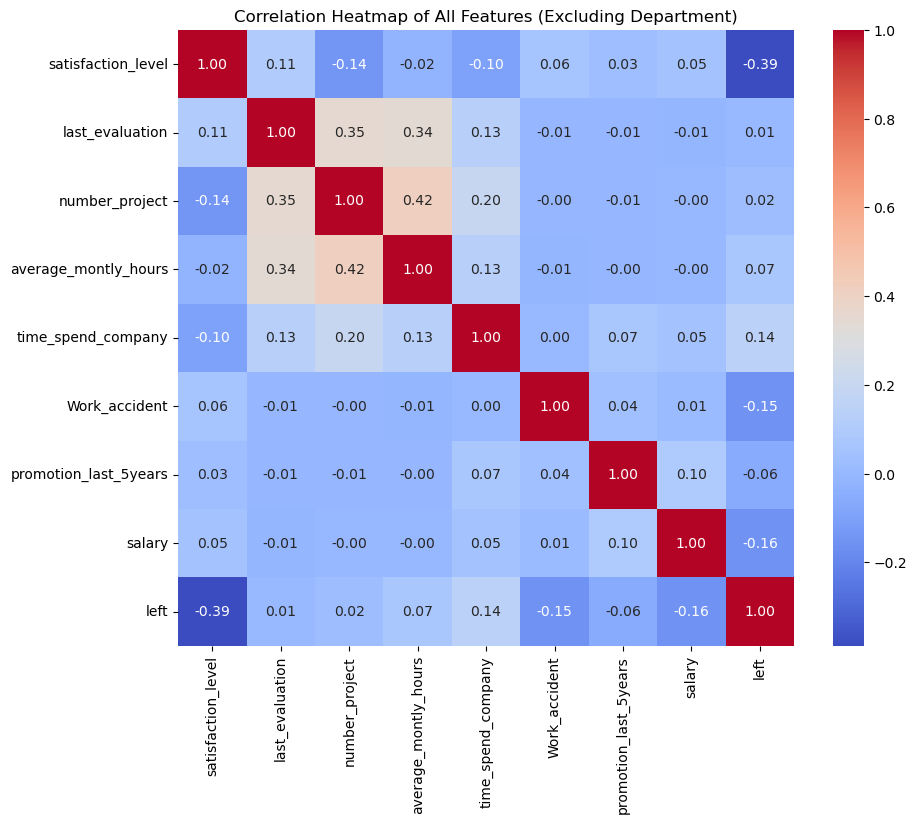

In [9]:
plot_correlation_heatmap(X, y)